<a href="https://colab.research.google.com/github/hirokimituya/stock-price-analysis/blob/main/technical_analysis/book/%E6%A0%AA%E4%BE%A1%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E8%A7%A3%E6%9E%90%E3%81%A8%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シリコンバレーPython大全の株価のデータ解析と予測の箇所


In [63]:
import datetime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection

In [64]:
df_aapl = pandas_datareader.data.DataReader('AAPL', 'stooq', '2020-01-01').sort_index()
df_meta = pandas_datareader.data.DataReader('META', 'stooq', '2020-01-01').sort_index()
df_gold = pandas_datareader.data.DataReader('GLD', 'stooq', '2020-01-01').sort_index()
df_aapl.tail(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-24,158.86,160.34,157.85,160.25,59256343.0
2023-03-27,159.94,160.77,157.87,158.28,52390266.0
2023-03-28,157.97,158.49,155.98,157.65,45914289.0


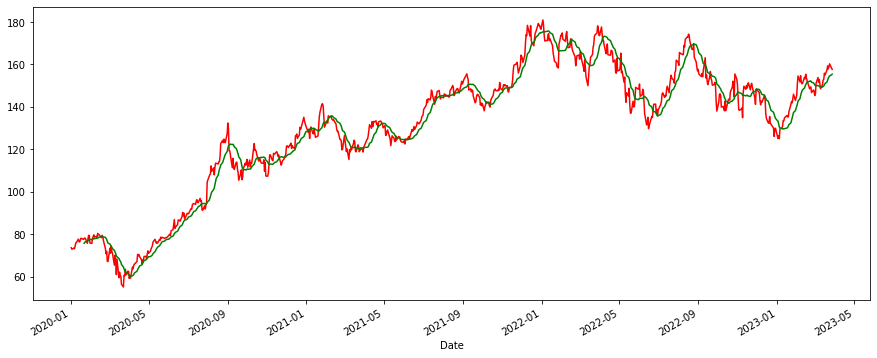

In [65]:
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()
df_aapl['Close'].plot(figsize=(15,6), color='red')
df_aapl['SMA'].plot(figsize=(15,6), color='green')
plt.show()

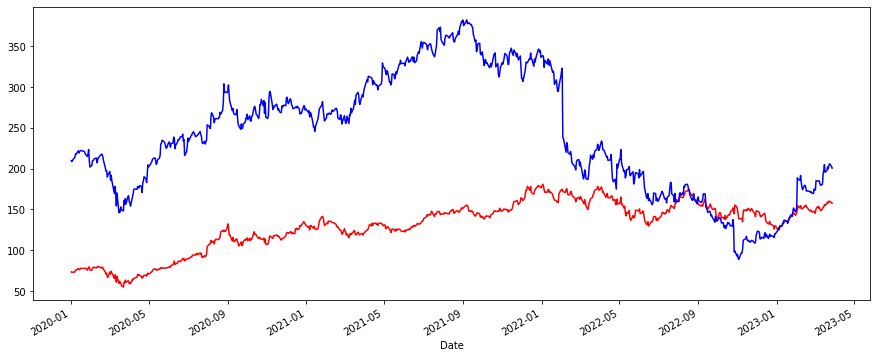

In [66]:
df_aapl['Close'].plot(figsize=(15,6), color='red')
df_meta['Close'].plot(figsize=(15,6), color='blue')
plt.show()

In [67]:
df_aapl['changing'] = ((df_aapl['Close'] - df_aapl['Open']) / (df_aapl['Open']) * 100)
df_meta['changing'] = ((df_meta['Close'] - df_meta['Open']) / (df_meta['Open']) * 100)
df_gold['changing'] = ((df_gold['Close'] - df_gold['Open']) / (df_gold['Open']) * 100)
df_aapl.tail(2).round(2)

,Open,High,Low,Close,Volume,SMA,changing
Date,,,,,,,
2023-03-27,159.94,160.77,157.87,158.28,52390266.0,155.06,-1.04
2023-03-28,157.97,158.49,155.98,157.65,45914289.0,155.40,-0.20


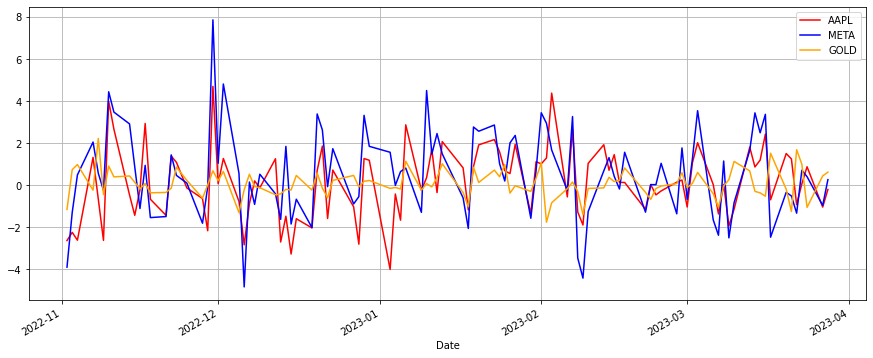

In [68]:
df_aapl['changing'].tail(100).plot(grid=True, figsize=(15, 6), color='red', label='AAPL')
df_meta['changing'].tail(100).plot(grid=True, figsize=(15, 6), color='blue', label='META')
df_gold['changing'].tail(100).plot(grid=True, figsize=(15, 6), color='orange', label='GOLD')
plt.legend()
plt.show()

In [69]:
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(35)

,Open,High,Low,Close,Volume,SMA,changing,label
Date,,,,,,,,
2023-02-07,150.640,155.2300,150.6400,154.65,83322551.0,145.210714,2.661976,157.83
2023-02-08,153.880,154.5800,151.1680,151.92,64120079.0,146.400000,-1.273720,158.93
2023-02-09,153.775,154.3300,150.4200,150.87,56007143.0,147.328571,-1.889124,160.25
2023-02-10,149.460,151.3401,149.2200,151.01,57450708.0,148.035714,1.037067,158.28
2023-02-13,150.952,154.2600,150.9200,153.85,62199013.0,148.844286,1.919816,157.65
2023-02-14,152.120,153.7700,150.8600,153.20,61707573.0,149.654286,0.709966,NaN
2023-02-15,153.110,155.5000,152.8800,155.33,65669252.0,150.466429,1.449938,NaN
2023-02-16,153.510,156.3300,153.3475,153.71,68167942.0,151.022143,0.130285,NaN
2023-02-17,152.350,153.0000,150.8500,152.55,59144118.0,151.704286,0.131277,NaN


In [70]:
X = np.array(df_aapl.drop(['label', 'SMA'], axis='columns'))
X = sklearn.preprocessing.scale(X)
X

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


array([[-1.92218188, -1.92606289, -1.89601371, -1.89287686,  0.50193635,
         0.73128611],
       [-1.91470018, -1.9261946 , -1.88518573, -1.91655148,  0.69897363,
        -0.01167226],
       [-1.94217956, -1.93125248, -1.91589964, -1.89741383,  0.19304687,
         1.10971291],
       ...,
       [ 0.9438528 ,  0.92944924,  0.97204235,  0.98635266, -0.90227908,
         0.43589214],
       [ 0.97971713,  0.94360867,  0.97271281,  0.92092196, -1.02400691,
        -0.66301534],
       [ 0.91429794,  0.86853077,  0.90935406,  0.89999743, -1.13881869,
        -0.18314125]])

In [71]:
y = np.array(df_aapl['label'])
y

array([ 79.7757,  78.3161,  79.4487,  78.6362,  76.8536,  73.2037,
        70.7223,  71.8458,  67.1492,  67.1093,  73.3552,  71.0284,
        74.3233,  71.9096,  70.9556,  65.3427,  70.0513,  67.6197,
        60.9411,  68.2419,  59.4637,  62.0796,  60.5572,  60.0927,
        56.2783,  55.084 ,  60.6082,  60.2771,  63.4465,  60.8215,
        62.5562,  62.4265,  59.1456,  60.1306,  59.2682,  64.4374,
        63.6897,  65.3187,  65.7934,  67.0834,  70.472 ,  69.828 ,
        70.3843,  69.4272,  67.9846,  65.887 ,  67.7813,  67.5211,
        69.4701,  69.52  ,  68.3923,  70.6365,  72.128 ,  70.9656,
        71.9695,  73.0542,  73.8069,  74.5666,  76.3422,  77.5445,
        76.6571,  75.734 ,  76.1966,  75.7489,  77.5325,  77.0848,
        78.5833,  77.9971,  78.5006,  77.9672,  78.3091,  78.344 ,
        78.2663,  79.2284,  79.5963,  80.0318,  79.343 ,  81.6041,
        82.0866,  84.6777,  86.8561,  82.6878,  83.4007,  84.4324,
        86.6696,  86.549 ,  86.5839,  86.0884,  88.3416,  90.2

In [72]:
y = y[:-30]
X = X[:-30]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2
)

In [73]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
accuracy

0.7754128372299525

In [74]:
predicted_data = lr.predict(X[-30:])
predicted_data

array([134.54057   , 131.90822515, 132.9817487 , 132.02094276,
       136.04087265, 138.93451652, 135.95067107, 138.38290542,
       137.20407633, 140.81639341, 141.92067838, 141.85010145,
       141.299449  , 141.50792302, 147.60704305, 146.68077638,
       144.80709652, 146.72084729, 150.56164697, 146.35169077,
       146.58032052, 148.05297676, 148.76658281, 157.26918449,
       151.69016917, 156.48633927, 153.08275019, 153.12847038,
       152.77083887, 156.02791852])

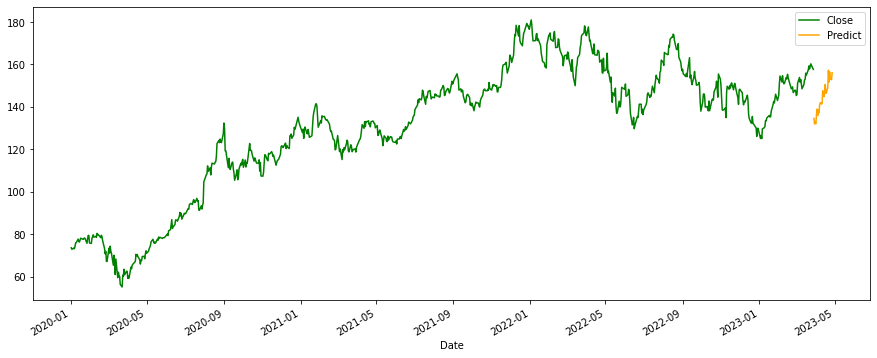

In [75]:
df_aapl['Predict'] = np.nan

last_date = df_aapl.iloc[-1].name
one_day = 60 * 60 * 24
next_day = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_day)
    df_aapl.loc[next_date] = np.append([np.nan] * (len(df_aapl.columns) - 1), data)
    next_day += one_day

df_aapl['Close'].plot(figsize=(15, 6), color='green', label='Close')
df_aapl['Predict'].plot(figsize=(15, 6), color='orange', label='Predict')
plt.legend()
plt.show()